#  DS PROJECT : Codon Usage : Data Cleaning

**GROUP 1**
1. Suvarna Sangram Aglave (2404343)
2. Sanika Nirmal Sahuji (2400145)
3. Kush Rakesh Mehta (2393362)
4. Keerthana Baithini (2382814)

In [3]:
#imports all essential libraries for data manipulation, visualization, and preprocessing.
import numpy as np
import pandas as pd

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

In [4]:
#read dataset from csv fie
# setting low_memory=False because it disables the memory optimization and makes pandas read the entire dataset.
df = pd.read_csv('Group_1_Raw_Data.csv', low_memory=False)
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [5]:
df.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [6]:
#number of records and features
df.shape

(13028, 69)

In [7]:
#check columns
print(df.columns.to_list())

['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']


### Part: 1 - Exploratory Data Analysis

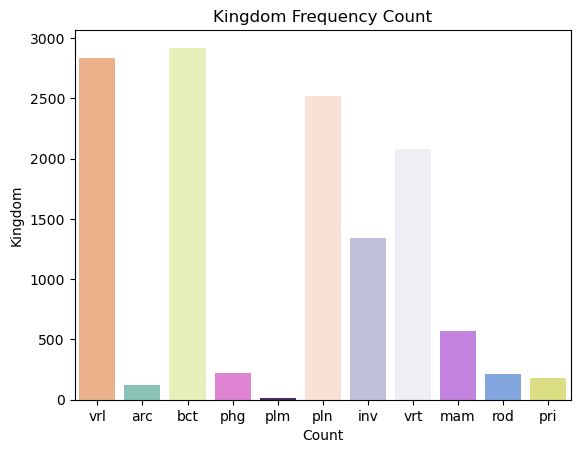

Kingdom
bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64

In [9]:
#using seaborn to create barplot
warnings.filterwarnings("ignore")
ax = sns.countplot(data = df, x = 'Kingdom', palette=['#faae7b','#7fcdbb','#edf8b1','#ed75de','#432371','#fee0d2','#bcbddc','#efedf5','#c775ed','#75a2ed','#ebed75'])

# setting the labels for the y-axis, x-axis, and title of the plot.
ax.set(ylabel='Kingdom', xlabel='Count', title = 'Kingdom Frequency Count')
plt.show()

# computes the frequency count of each unique value in the 'Kingdom' column of the DataFrame df1a.
display(df['Kingdom'].value_counts())

---
We can observe classes in 'Kingdom' data have highly imbalance count which may impact analysis

---

In [11]:
#check for missing values
print("Missing values in dataset are: ", df.isnull().sum())

Missing values in dataset are:  Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64


---
There are no missing values in the dataset, but columns "UUU" and "UUC" contain mixed data types. So we'll convert them to numeric and handle any non-numeric entries

---

### Part: 2 - Data Cleaning

In [14]:
#replacing non-numeric values with 0
df['UUC'] = df['UUC'].replace('-',0.0)
df['UUU'] = df['UUU'].replace('non-B hepatitis virus',0.0)
df['UUU'] = df['UUU'].replace('12;I',0.0)

#df2=df.loc[:,df.columns[5:]]
numerical_cols = df.select_dtypes(include=np.number).columns
df2=df[numerical_cols]
df2.corr()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,1.000000,-0.020671,-0.053869,0.460140,-0.039368,0.379493,0.067398,0.459092,-0.314457,0.459489,...,-0.218562,-0.085861,-0.324625,-0.273616,-0.459248,-0.100670,-0.497575,0.122864,-0.029795,0.458572
SpeciesID,-0.020671,1.000000,0.051598,0.025723,-0.047561,0.055892,0.021963,0.051111,-0.044642,0.036697,...,0.011598,-0.026532,-0.000266,-0.005639,-0.029184,-0.014164,-0.079152,0.048676,-0.008848,0.050192
Ncodons,-0.053869,0.051598,1.000000,-0.033718,0.009483,-0.040623,-0.001755,-0.049954,0.081045,-0.039622,...,0.068304,-0.010998,0.001491,0.024825,0.034597,0.028578,0.053022,-0.026197,0.003334,-0.047956
UUA,0.460140,0.025723,-0.033718,1.000000,0.024444,0.255725,-0.364357,0.189287,-0.552023,0.821485,...,-0.396365,0.231872,-0.273705,0.081008,-0.633599,0.188387,-0.577686,0.256173,0.009338,0.331463
UUG,-0.039368,-0.047561,0.009483,0.024444,1.000000,-0.008412,-0.476516,-0.418961,-0.145852,0.032653,...,-0.036611,0.396104,0.288006,0.475718,-0.159748,0.315423,0.115329,-0.126004,0.054169,-0.468188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.100670,-0.014164,0.028578,0.188387,0.315423,-0.027929,-0.532930,-0.286724,-0.291093,0.175480,...,-0.227873,0.476831,0.046443,0.684505,-0.218521,1.000000,-0.085190,0.075282,-0.019106,-0.401934
GAG,-0.497575,-0.079152,0.053022,-0.577686,0.115329,-0.430749,0.013373,-0.592600,0.561787,-0.636360,...,0.524106,0.057005,0.477515,0.120136,0.672882,-0.085190,1.000000,-0.281574,0.004208,-0.582578
UAA,0.122864,0.048676,-0.026197,0.256173,-0.126004,0.162526,0.014513,0.230416,-0.224573,0.252878,...,-0.238508,0.017020,-0.153595,-0.070042,-0.285659,0.075282,-0.281574,1.000000,0.178215,0.268220
UAG,-0.029795,-0.008848,0.003334,0.009338,0.054169,0.008880,-0.009682,-0.031023,-0.025993,-0.018237,...,0.006107,0.046580,0.083475,-0.013325,-0.055482,-0.019106,0.004208,0.178215,1.000000,0.005767


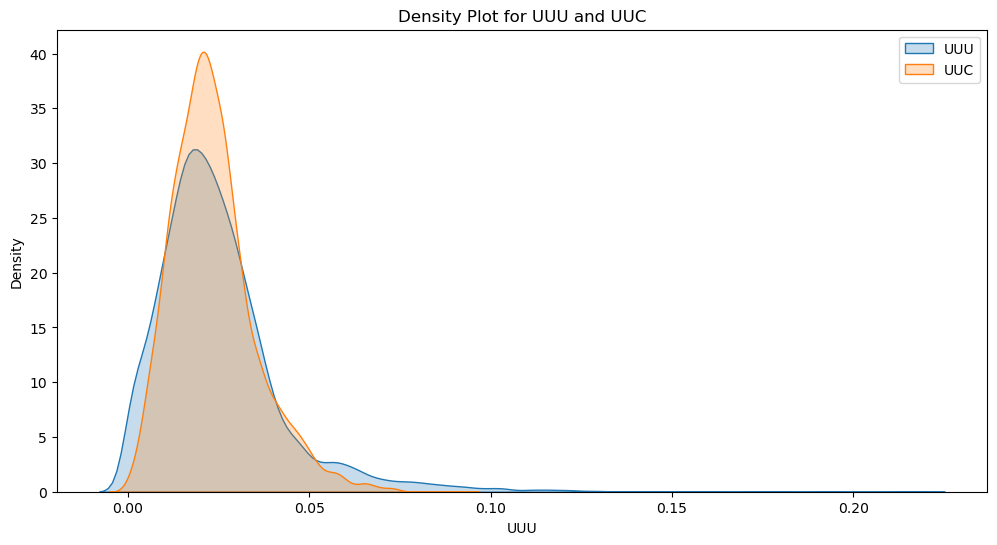

In [15]:
# Distribution Plot for Specific Columns 'UUU' and 'UUC'
plt.figure(figsize=(12, 6))

# Convert 'UUU' and 'UUC' columns to numeric if possible, handling errors
try:
  df['UUU'] = pd.to_numeric(df['UUU'])
  sns.kdeplot(df['UUU'], label='UUU', fill=True)
except ValueError:
  print("Warning: 'UUU' column could not be converted to numeric. Skipping KDE plot.")

try:
  df['UUC'] = pd.to_numeric(df['UUC'])
  sns.kdeplot(df['UUC'], label='UUC', fill=True)
except ValueError:
  print("Warning: 'UUC' column could not be converted to numeric. Skipping KDE plot.")

plt.title("Density Plot for UUU and UUC")
plt.legend()
plt.show()

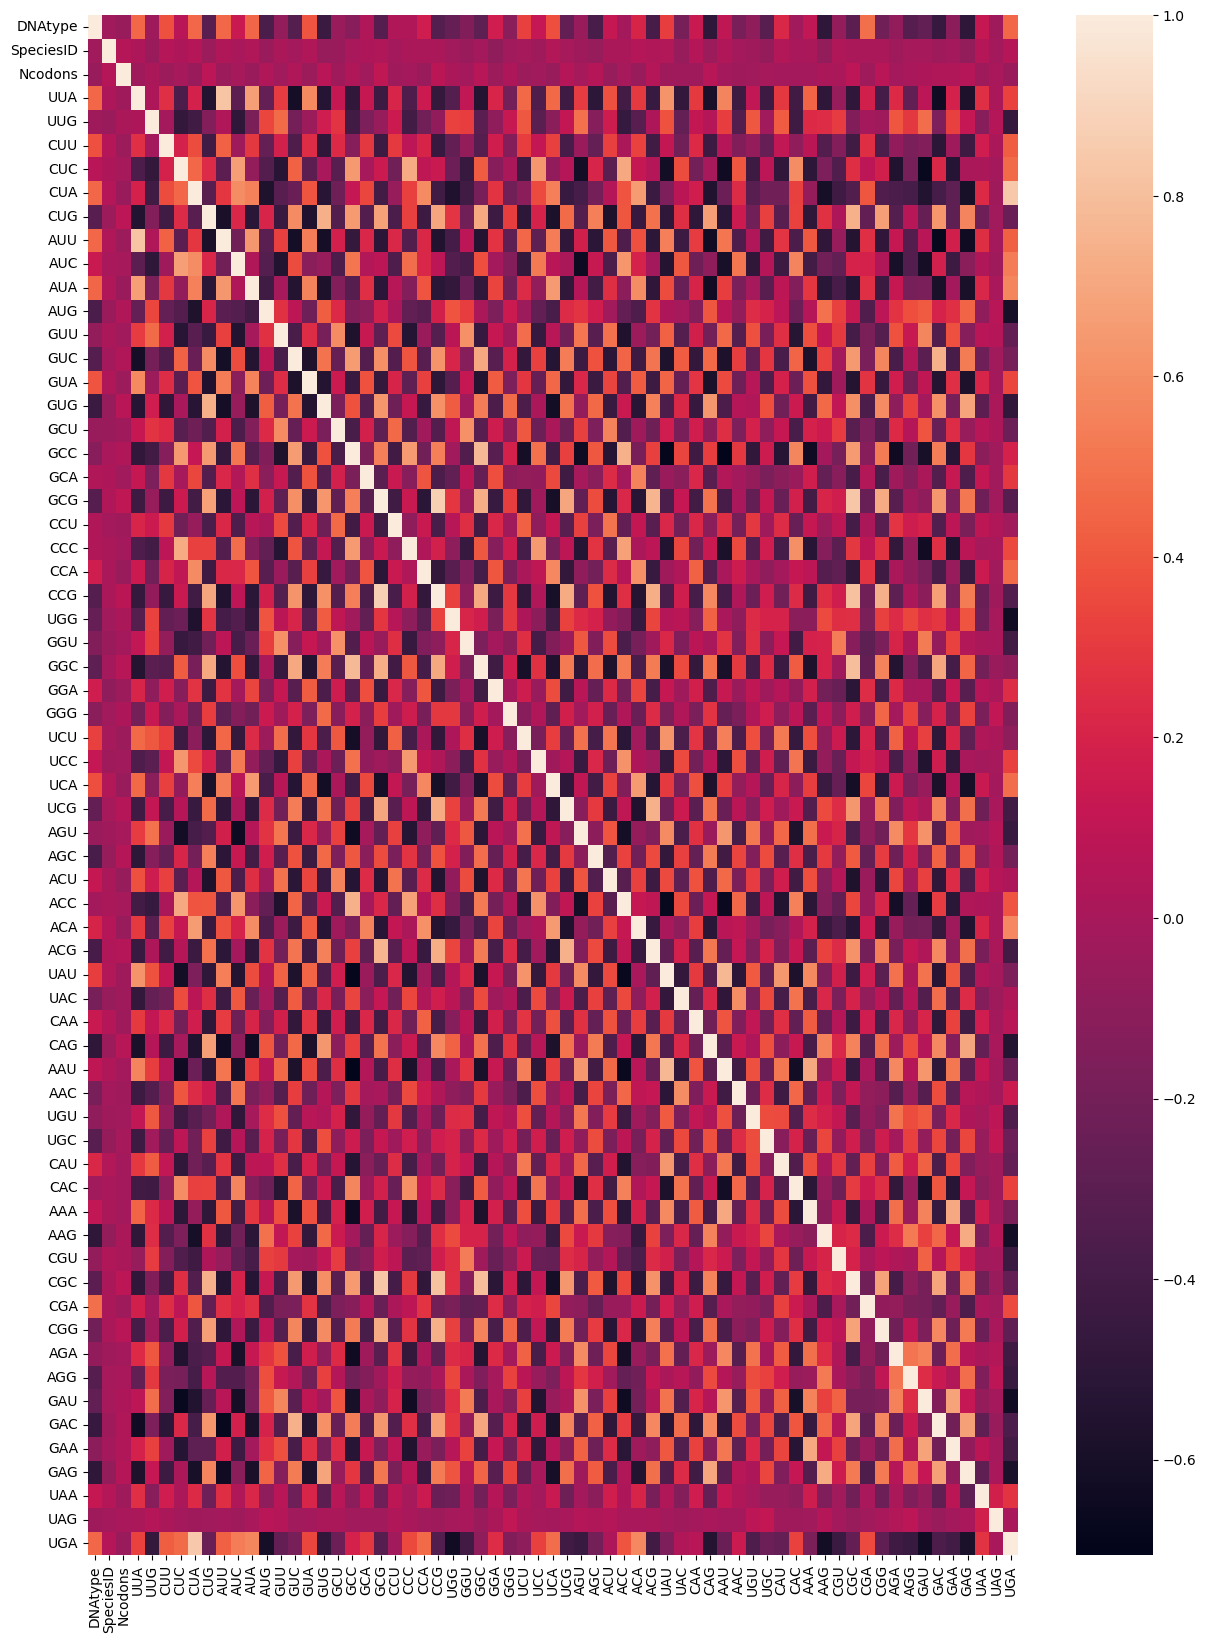

In [16]:
# plot heatmap of all features at once from above correlation
figure(figsize=(15, 20))
sns.heatmap(df2.corr())
plt.show()

---
- The heatmap is symmetric about the diagonal, as expected in a correlation matrix.

- The diagonal itself is pure white (correlation of 1), indicating perfect correlation for each codon with itself.

- It shows the low correlation between most codons, dimensionality reduction techniques like PCA might be useful for feature elimination. Alternatively, if there are codons with high correlations, we could consider reducing redundancy by selecting only one of each highly correlated pair, depending on the analysis goals.

---

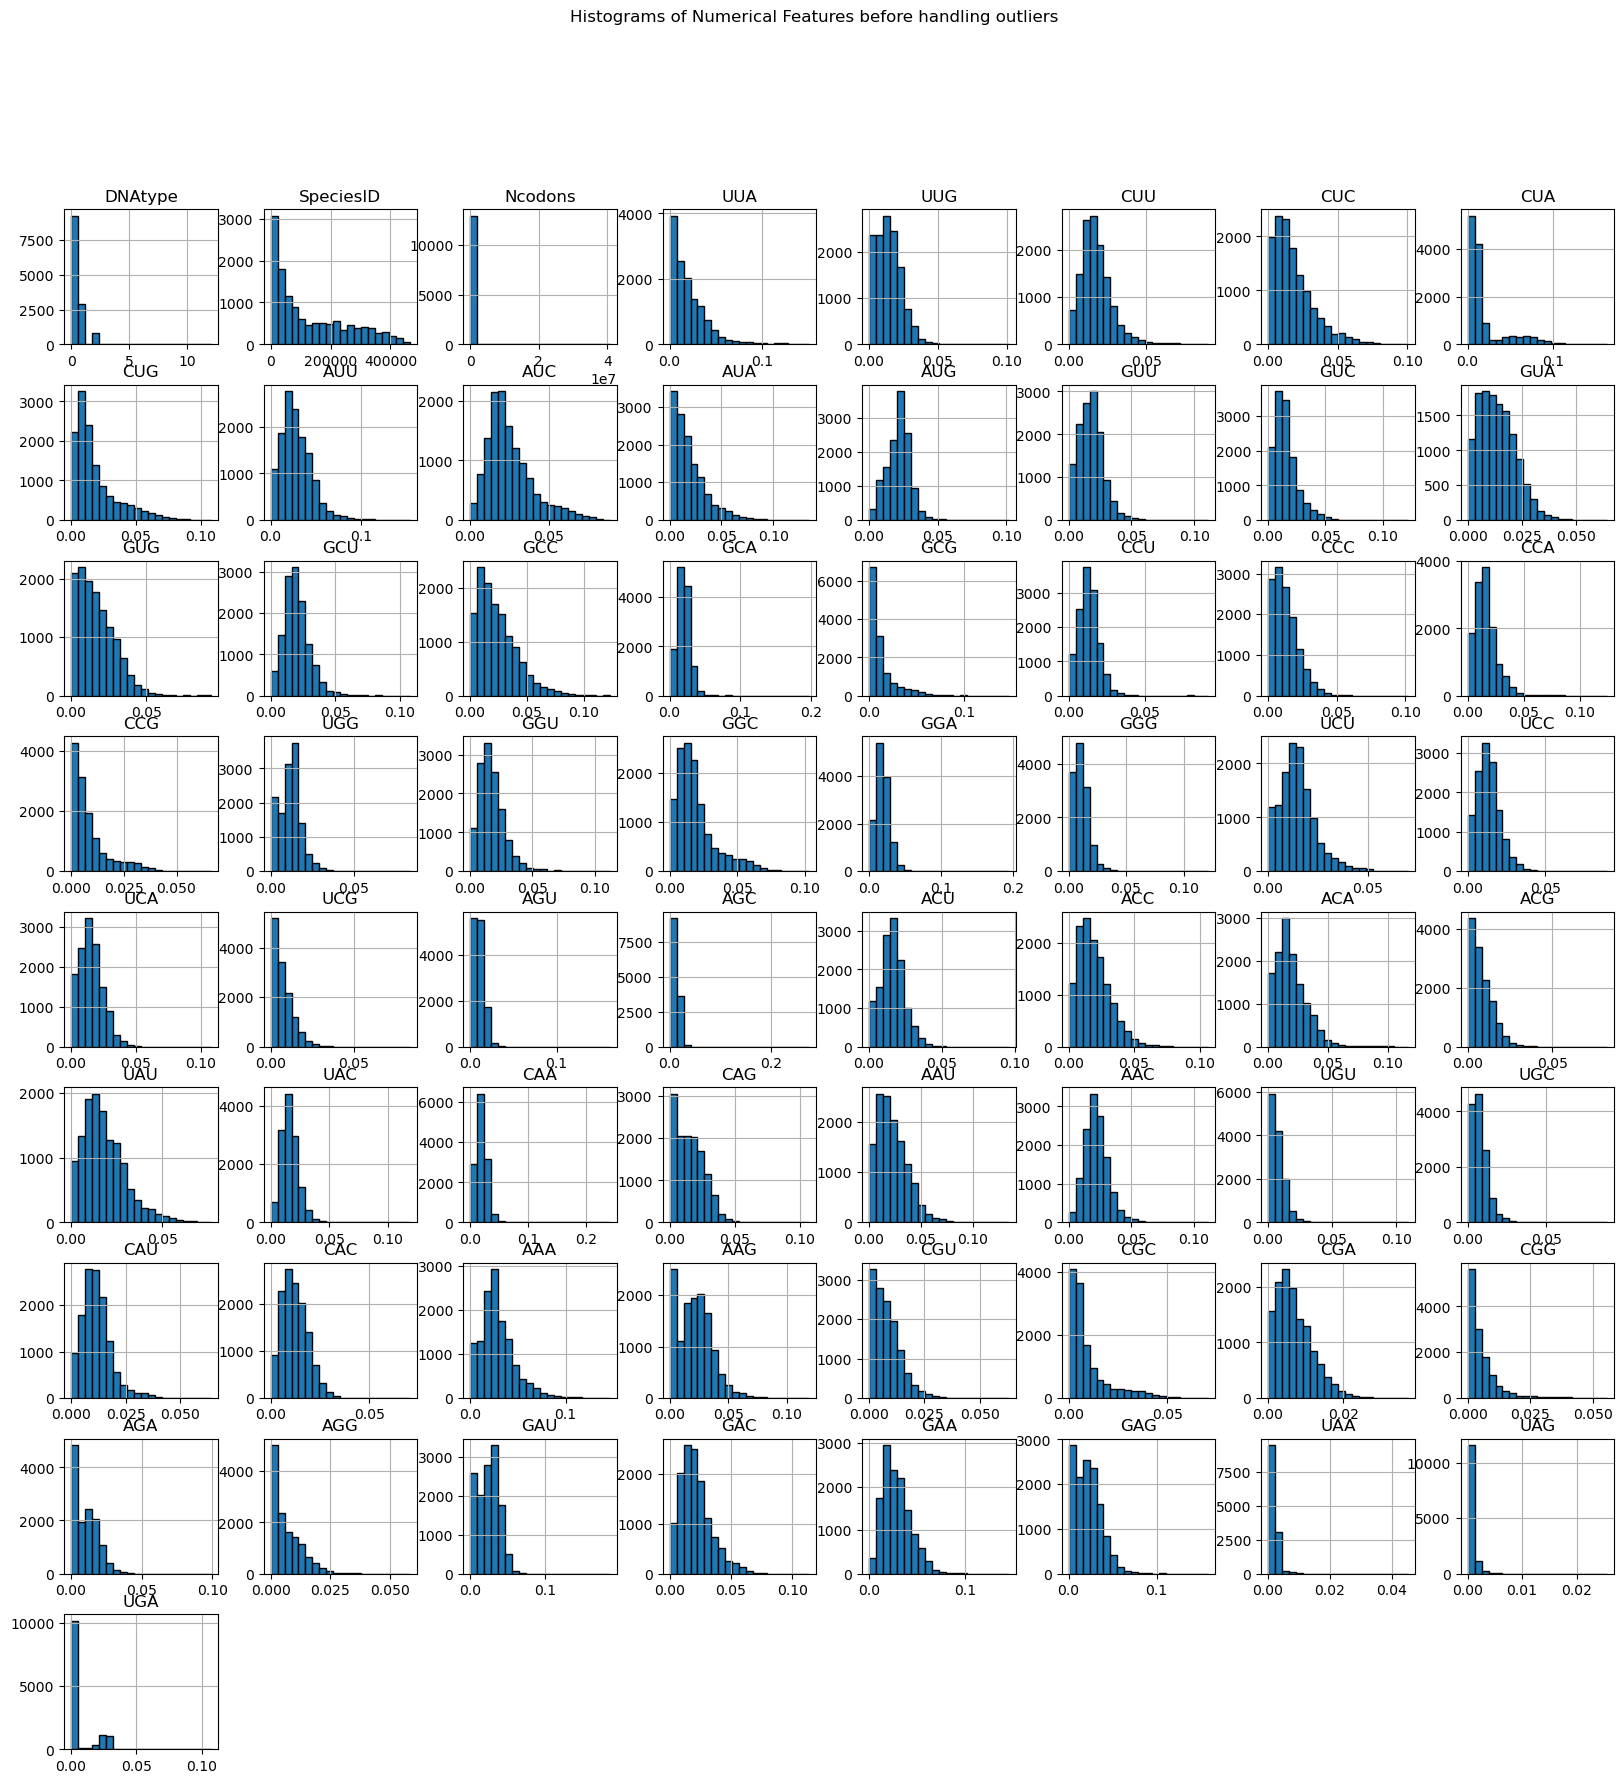

In [18]:
# Histograms for distribution of each numerical feature
df2.hist(bins=20, figsize=(20, 20), edgecolor='black')
plt.suptitle("Histograms of Numerical Features before handling outliers")
plt.show()

- For some codons, like UAA, UGA (stop codons), and less frequent ones like AGG, there are small peaks in the higher frequency ranges, indicating occasional outliers.

- Some codons have more concentrated usage (e.g., UUU, UUG), while others are more spread out, showing wider variability in their frequencies (e.g., GGA, CUG).

- Stop codons (UAA, UAG, UGA) and rare codons tend to have distinct patterns, often concentrated in lower frequency ranges.
  
- High skewness or spread, indicates outliers.

In [20]:
#function to detect outliers using IQR method
def detect_outliers_using_iqr(df, feature_name):

    #calculate 25th percentile(Q1) and 75th percentile(Q3)
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)

    #calculate IQR
    IQR = Q3 - Q1

    #calculate outlier range using IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #check for outliers
    outliers = (df[feature_name] < lower_bound) | (df[feature_name] > upper_bound)

    return outliers

#function to replace outliers using mean
def replace_outliers_using_mean(outliers, df, feature_name):

    #calculate the mean of non-outlier values
    mean_value = df.loc[~outliers, feature_name].mean()

    #replace outliers with the mean of non-outlier values
    df.loc[outliers, feature_name] = mean_value

    return df

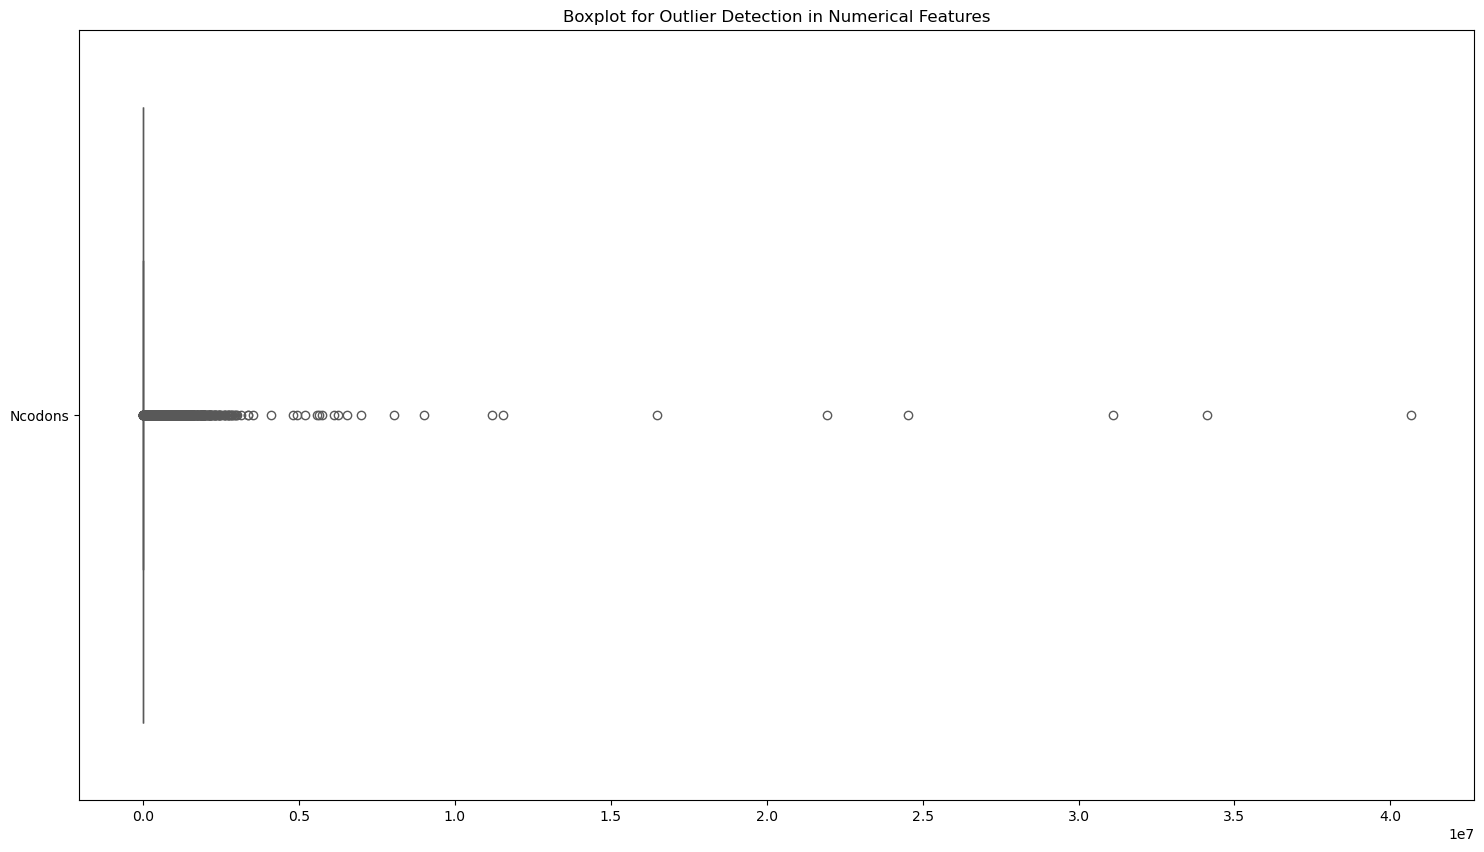

In [21]:
# Boxplot for Ncodons and SpeciesID Outlier Detection
# This will help you see the distribution and potential outliers for each column
df3=df.loc[:,df.columns[3:4]]
plt.figure(figsize=(18, 10))
sns.boxplot(data=df3, orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection in Numerical Features")
plt.show()

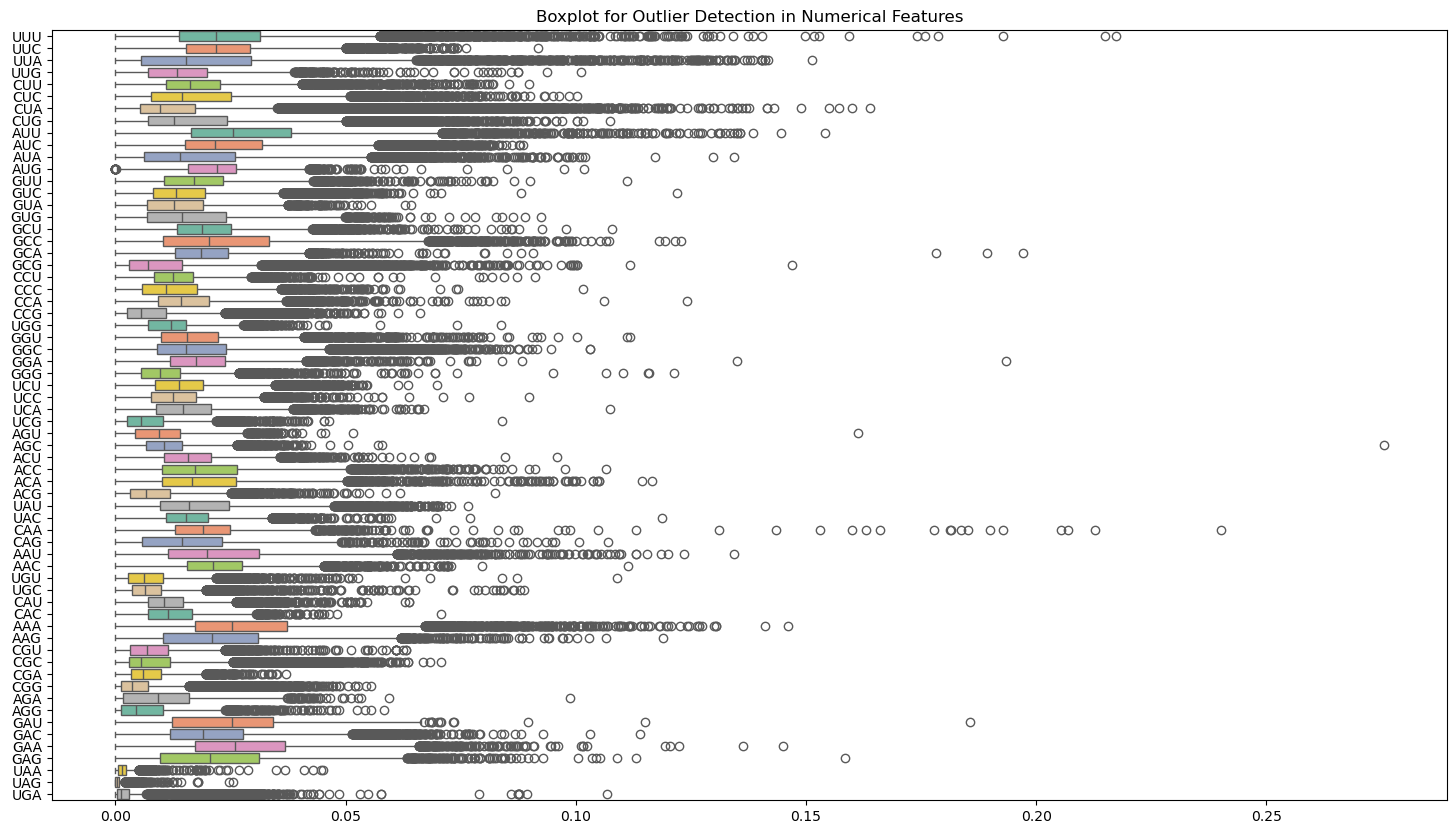

In [22]:
# Boxplot for Outlier Detection
# This will help you see the distribution and potential outliers for each column
df4=df.loc[:,df.columns[5:]]
plt.figure(figsize=(18, 10))
sns.boxplot(data=df4, orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection in Numerical Features")
plt.show()

---

We can observe from above boxplot due to highly imbalanced data, the outliers are high in number. 
So it would not be good to remove high amount of outliers as it will reduce huge amount of data and reduce dataset size which will impact further analysis and would not be ideal to train model in small dataset and hence perform correct classification or predictions on.
Hence, we will replace outliers using mean imputation.

---

In [24]:
# Select only numerical features for outlier handling
numerical_columns = df.select_dtypes(include='number')
print("All numerical columns in dataset are: \n")
print(numerical_columns.columns)
all_outliers = 0

# Handle outliers for numerical columns
for col in numerical_columns.columns:
  #if col not in ['DNAtype', 'SpeciesID', 'Ncodons']:
      outliers = detect_outliers_using_iqr(df, col)
      all_outliers+=outliers.sum()

      while(outliers.sum() > 0):
        df = replace_outliers_using_mean(outliers, df, col)
        outliers = detect_outliers_using_iqr(df, col)

print("\nTotal outliers were: ", all_outliers)
print("\nHandled all outliers by mean imputation")

All numerical columns in dataset are: 

Index(['DNAtype', 'SpeciesID', 'Ncodons', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU',
       'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA',
       'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG',
       'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC',
       'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC',
       'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG',
       'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA'],
      dtype='object')

Total outliers were:  29568

Handled all outliers by mean imputation


In [25]:
#as we handled all outlers by mean imputation our dataset doesn't change
df.shape

(13028, 69)

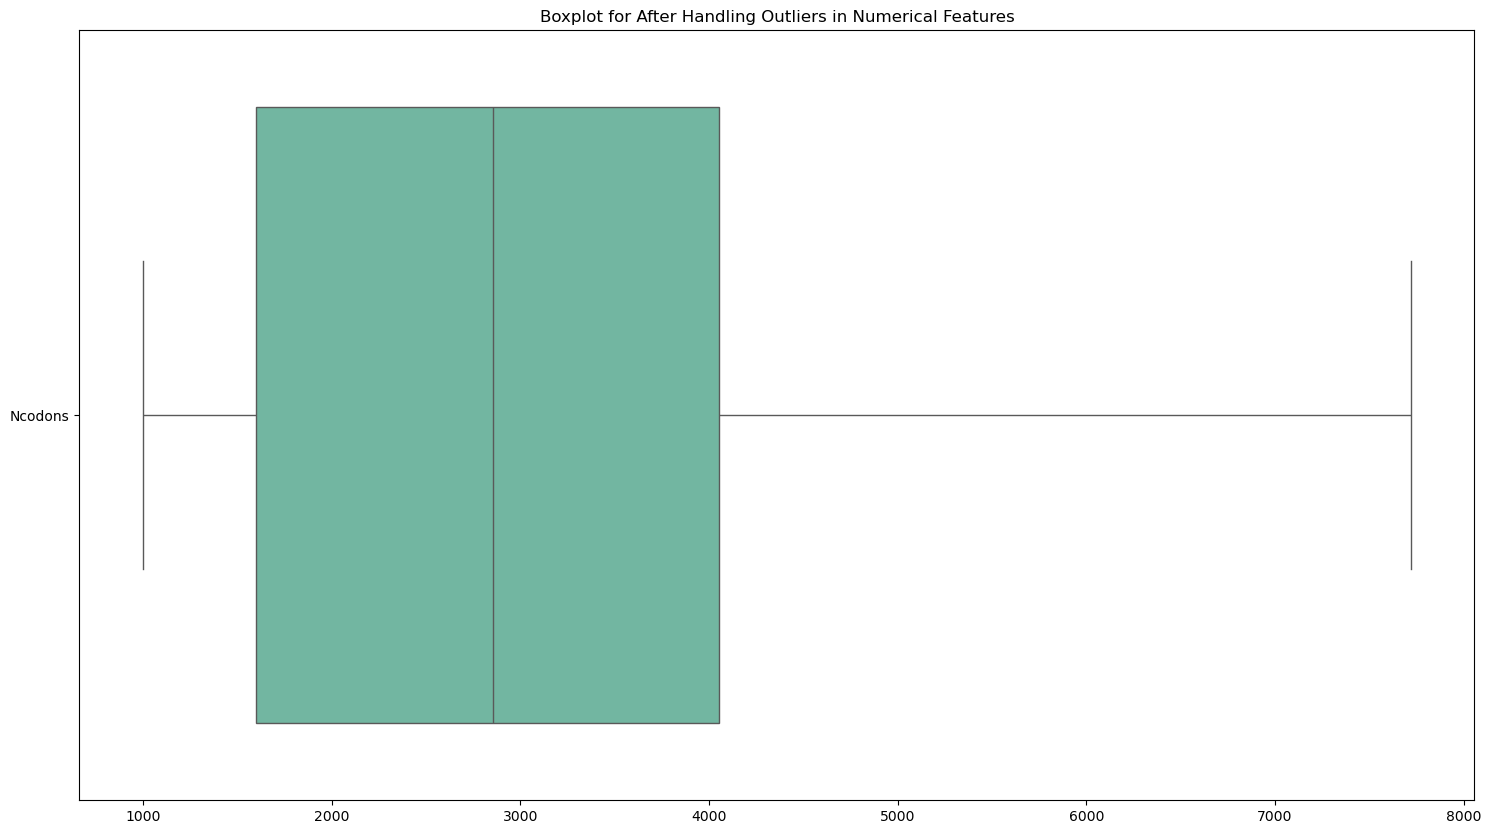

In [26]:
df3=df.loc[:,df.columns[3:4]]
plt.figure(figsize=(18, 10))
sns.boxplot(data=df3, orient="h", palette="Set2")
plt.title("Boxplot for After Handling Outliers in Numerical Features")
plt.show()

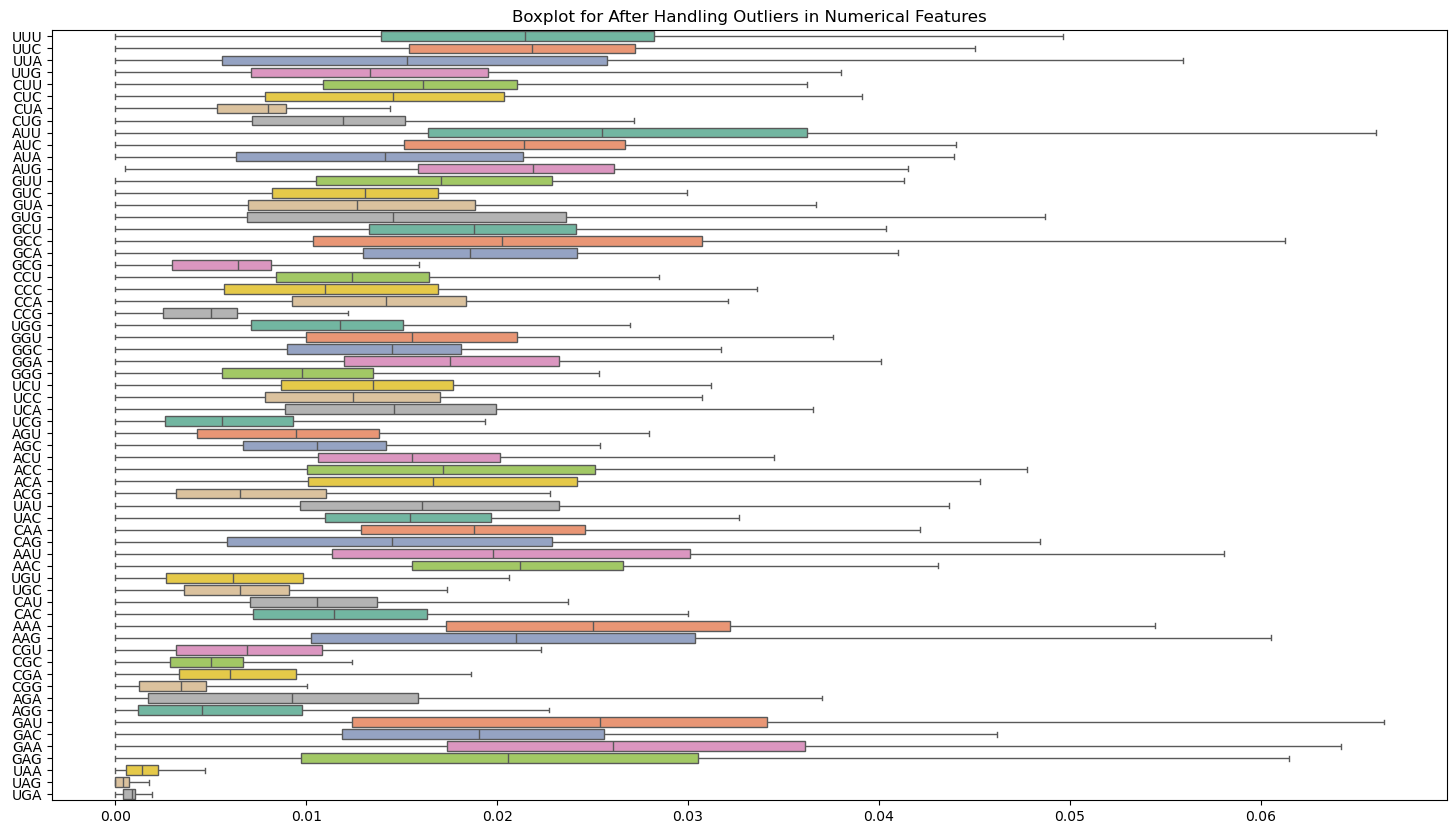

In [27]:
# Boxplot for After Handlling Outliers
# This will help you see the distribution and potential outliers for each column
df4=df.loc[:,df.columns[5:]]
plt.figure(figsize=(18, 10))
sns.boxplot(data=df4, orient="h", palette="Set2")
plt.title("Boxplot for After Handling Outliers in Numerical Features")
plt.show()

---

We can also observe from above boxplot that the outliers are handled using mean imputation. Also below histogram shows the skewness of data reduced due to the mean imputation.

---

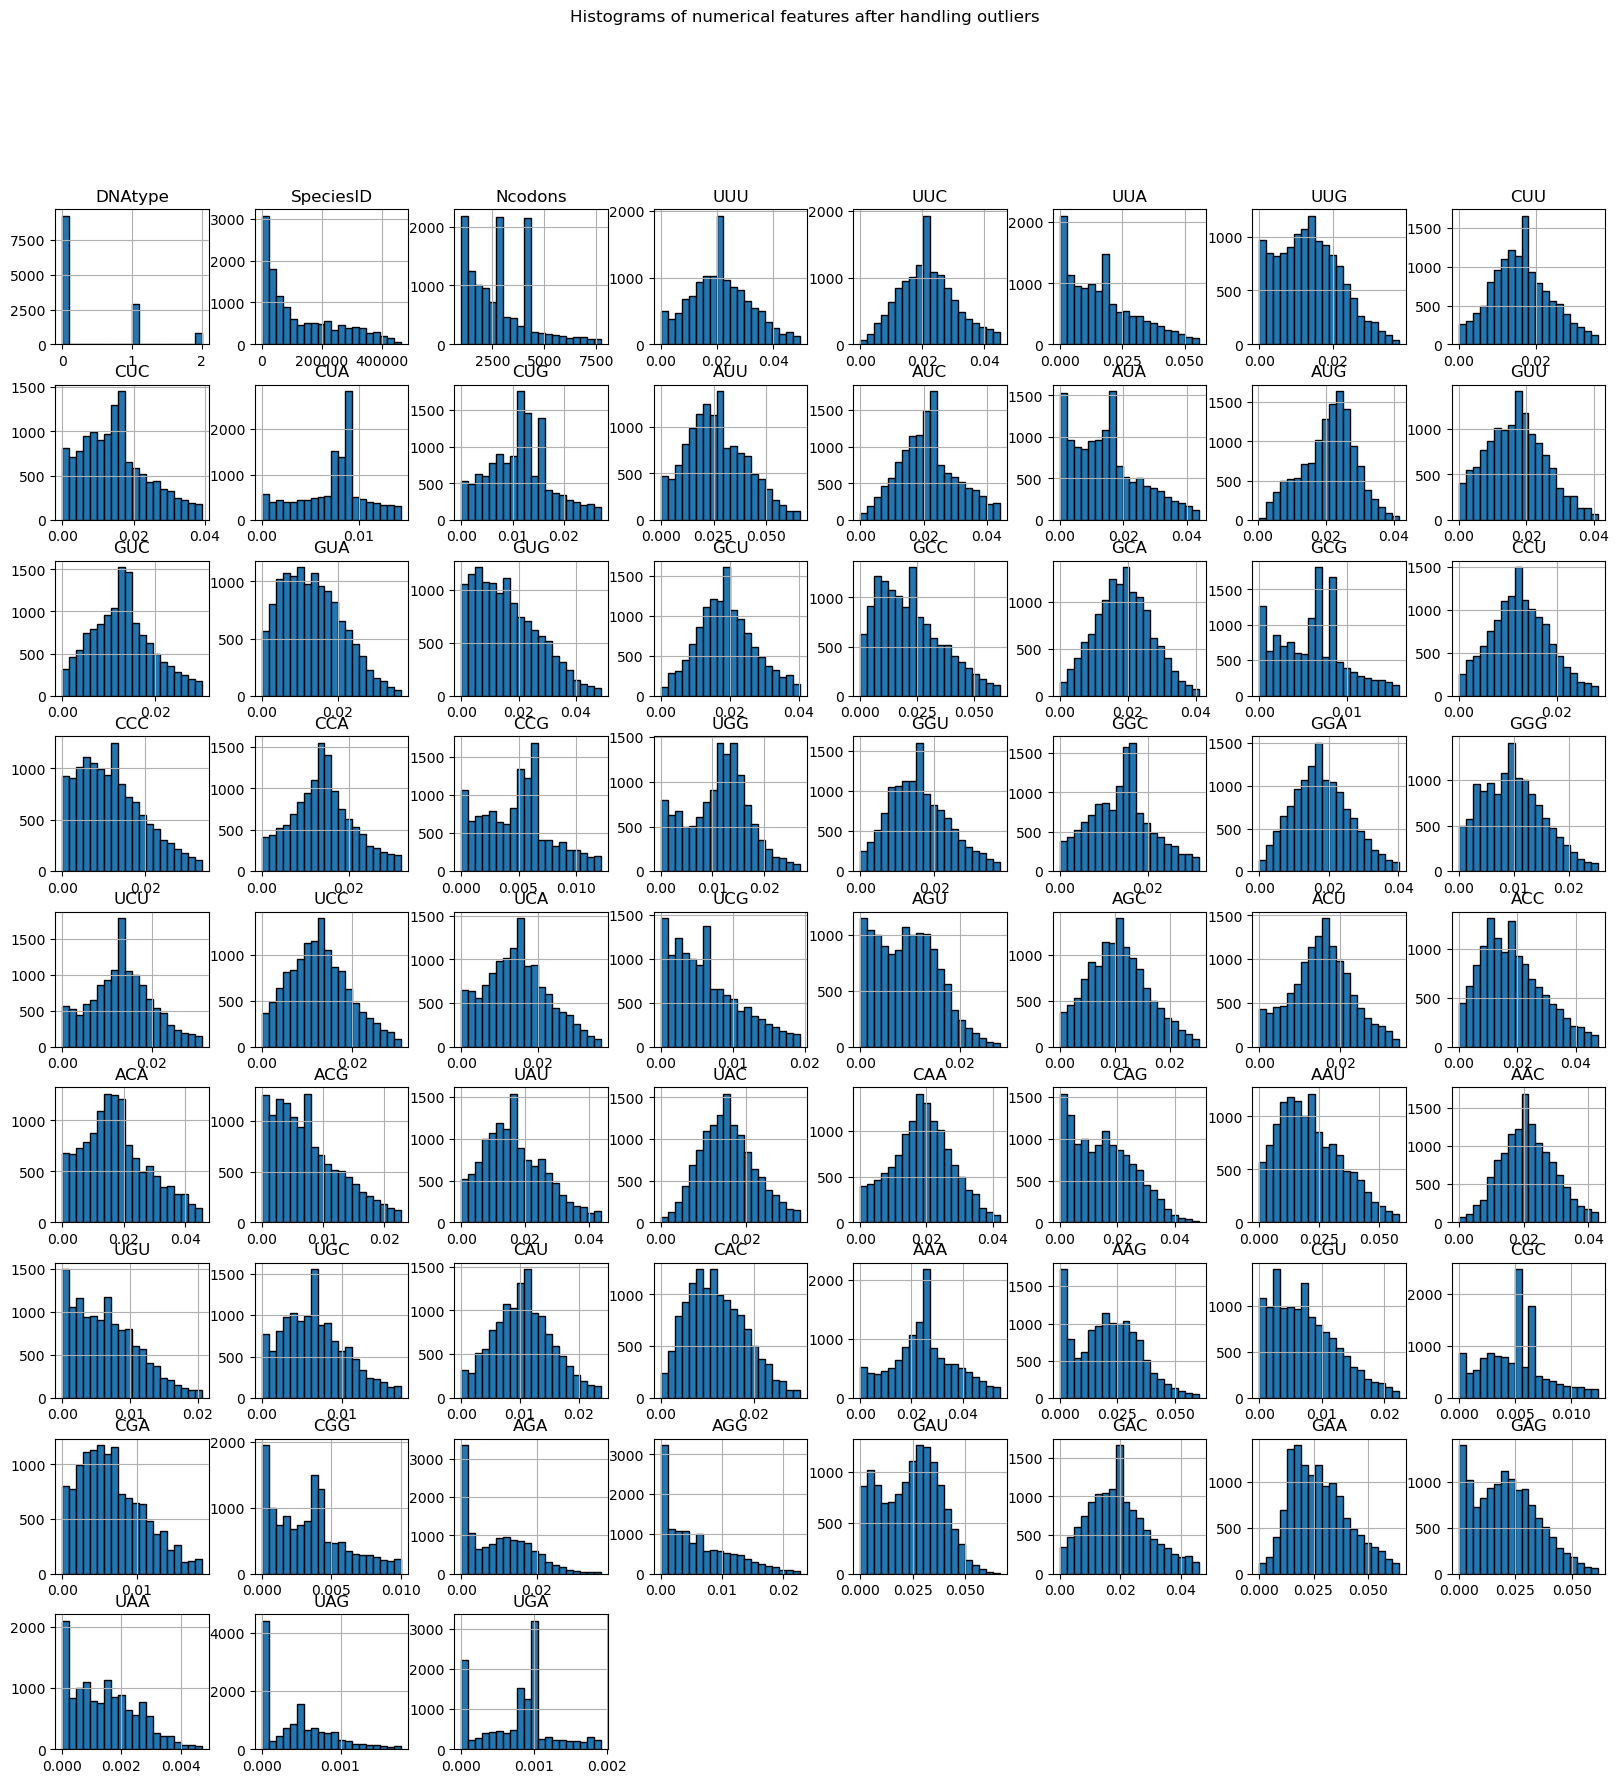

In [29]:
# Histograms for distribution of each numerical feature
numerical_cols = df.select_dtypes(include=np.number).columns
df2=df[numerical_cols]
df2.hist(bins=20, figsize=(20, 20), edgecolor='black')
plt.suptitle("Histograms of numerical features after handling outliers")
plt.show()

In [30]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.0,100217,1995.000000,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0.0,100220,1474.000000,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0.0,100755,4862.000000,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0.0,100880,1915.000000,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0.0,100887,4051.319086,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [31]:
#encode the "Kingdom" column with LabelEncoder
label_encoder = LabelEncoder()
df_encoded=df.copy()
df_encoded['Kingdom'] = label_encoder.fit_transform(df['Kingdom'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding done for different sub-species is as :")
label_mapping

Label encoding done for different sub-species is as :


{'arc': 0,
 'bct': 1,
 'inv': 2,
 'mam': 3,
 'phg': 4,
 'plm': 5,
 'pln': 6,
 'pri': 7,
 'rod': 8,
 'vrl': 9,
 'vrt': 10}

**OBSERVATION / CONCLUSION:-**

Our dataset contains codon usage frequencies for various species, identified by columns like "Kingdom" and "SpeciesName." Label encoding has been applied to the "Kingdom" column as it is our target, effectively transforming categorical values into numerical form for model compatibility. The codon frequency distribution were right-skewed, with many low-frequency values and the presence of stop codons suggests sparsity in certain regions, managed by handling outliers using mean imputation. The dataset appears clean, with no missing values, as verified in earlier steps. Next steps could involve scaling or normalizing the data to standardize codon frequency ranges for modeling tasks.

In [33]:
df['Kingdom']=df_encoded['Kingdom']

In [34]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,9,0.0,100217,1995.000000,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,9,0.0,100220,1474.000000,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,9,0.0,100755,4862.000000,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,9,0.0,100880,1915.000000,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,9,0.0,100887,4051.319086,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [35]:
#exporting cleaned data from df to a CSV file
df.to_csv('Group_1_Clean_Data.csv', index=False)

### Conclusion

Data didn't have any missing values. Mixed data types addressed in columns 'UUU' & 'UUC'. And removing huge number of impact analysis and model performance hence  handled using mean imputation.